<a href="https://colab.research.google.com/github/rootofdata/Outlier_Detection/blob/main/Difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised outlier detection for Time series data using LSTM + AE
Feature : TMP,HMD,TVOC,CO,CO2,CH2O,PM10 (7 features)   
Time : 2022-04-01 ~ 2022-05-16

### Difference

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
def adf_test(timeseries, pvalue = .05, regression_option = 'ct'):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput[1] < pvalue:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.")
    else:
       print(f"정상시계열이 아니라는 귀무가설을 {pvalue*100}%의 유의수준으로 기각할 수 없으므로 해당 데이터는 정상성을 보장하지 못합니다.")

In [ ]:
def adf_test1(timeseries, pvalue = .05, regression_option = 'ct'):
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    if dfoutput[1] < pvalue:
       print(timeseries.name,f"정상성이 보장됩니다.")
    else:
       print(timeseries.name,f"정상성을 보장하지 못합니다.")

In [ ]:
adf_test(device11['PM2.5'])

Results of Dickey-Fuller Test:
Test Statistic                -7.458746e+00
p-value                        1.267955e-09
Lags Used                      4.900000e+01
Number of Observations Used    2.680800e+04
Critical Value (1%)           -3.959108e+00
Critical Value (5%)           -3.410654e+00
Critical Value (10%)          -3.127146e+00
dtype: float64
정상시계열이 아니라는 귀무가설을 5.0%의 유의수준으로 기각할 수 있으므로 해당 데이터는 정상성이 보장됩니다.


https://signature95.tistory.com/22 참고

In [ ]:
for i in range(14):
  adf_test1(device11.iloc[:,3+i])

CH2O 정상성이 보장됩니다.
PM2.5 정상성이 보장됩니다.
PM10 정상성이 보장됩니다.
TVOC 정상성이 보장됩니다.
CO2 정상성이 보장됩니다.
Temperature 정상성이 보장됩니다.
Humidity 정상성이 보장됩니다.
Radioactivity 정상성이 보장됩니다.
Sound 정상성이 보장됩니다.
CO 정상성을 보장하지 못합니다.
Stink 정상성이 보장됩니다.
NO2 정상성을 보장하지 못합니다.
H2S 정상성을 보장하지 못합니다.
NH3 정상성을 보장하지 못합니다.


device11로 하였을 경우, CO,NO2,H2S,NH3를 제외한 모든 부분에서 정상성을 만족한다.

In [ ]:
diff_data=d11_1.copy()

In [ ]:
# 전체 1차 차분
for i in range(14):
  diff_data.iloc[:,3+i]=diff_data.iloc[:,3+i].replace(diff_data.iloc[:,3+i].diff().dropna())

In [ ]:
for i in range(14):
  adf_test1(diff_data.iloc[:,3+i])

CH2O 정상성을 보장하지 못합니다.
PM2.5 정상성을 보장하지 못합니다.
PM10 정상성을 보장하지 못합니다.
TVOC 정상성을 보장하지 못합니다.
CO2 정상성이 보장됩니다.
Temperature 정상성을 보장하지 못합니다.
Humidity 정상성을 보장하지 못합니다.
Radioactivity 정상성이 보장됩니다.
Sound 정상성이 보장됩니다.
CO 정상성을 보장하지 못합니다.
Stink 정상성을 보장하지 못합니다.
NO2 정상성을 보장하지 못합니다.
H2S 정상성을 보장하지 못합니다.
NH3 정상성을 보장하지 못합니다.


In [ ]:
def diff1(timeseries, pvalue = .05, regression_option = 'ct'):
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    if dfoutput[1] < pvalue:
       timeseries=timeseries
    else:
       timeseries=timeseries.replace(timeseries.diff(1).dropna())
def diff2(timeseries, pvalue = .05, regression_option = 'ct'):
    dftest = adfuller(timeseries, autolag='AIC', regression = regression_option)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    if dfoutput[1] < pvalue:
       timeseries=timeseries
    else:
       timeseries=timeseries.replace(timeseries.diff().diff().dropna())

In [ ]:
for i in range(14):
  diff1(diff_data.iloc[:,3+i])
  diff2(diff_data.iloc[:,3+i])

In [ ]:
for i in range(14):
  adf_test1(diff_data.iloc[:,3+i])

CH2O 정상성을 보장하지 못합니다.
PM2.5 정상성을 보장하지 못합니다.
PM10 정상성을 보장하지 못합니다.
TVOC 정상성을 보장하지 못합니다.
CO2 정상성이 보장됩니다.
Temperature 정상성을 보장하지 못합니다.
Humidity 정상성을 보장하지 못합니다.
Radioactivity 정상성이 보장됩니다.
Sound 정상성이 보장됩니다.
CO 정상성을 보장하지 못합니다.
Stink 정상성을 보장하지 못합니다.
NO2 정상성을 보장하지 못합니다.
H2S 정상성을 보장하지 못합니다.
NH3 정상성을 보장하지 못합니다.



device11로 하면 정상성 잘 만족하는데, 쪼개서 하면 좀 정상성 만족을 못하는데 ? 당연히 기간이 짧아서 그런가

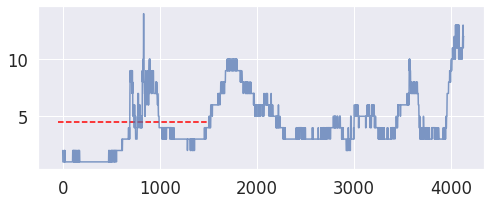

In [ ]:
plt.figure(figsize=(8,3)) 
plt.plot(d11_1['PM2.5'].values, alpha=.7) 
plt.hlines(y=d11_1['PM2.5'].mean(), xmin=-50, xmax=1500, colors='red', linestyles='dashed') 
plt.show()

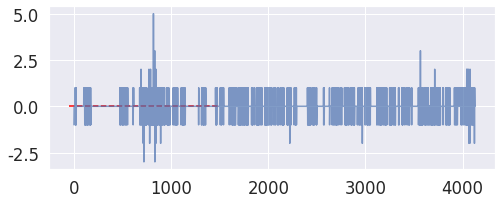

In [ ]:
plt.figure(figsize=(8,3)) 
plt.plot(diff_data1.values, alpha=.7) 
plt.hlines(y=diff_data1.mean(), xmin=-50, xmax=1500, colors='red', linestyles='dashed') 
plt.show()

정상성 만족 못하면?-> 로그 이후 차분 해야하나??